
<h1> <center> Analyze Impact of Regional Integration On Wind Energy & Renewable Energy Potential in New York State</h1> 


###  <center> Yixuan Zou, yz3909 </center>
#### <center> December, 2021 </center>

##### <p> This project aims to analyze the effect of combining different wind resource regions and to answer the question whether more stable power can be produced when we connect regions. Analysis will be done using one year hourly wind capacity factor data of eight sites (shown in the Fig1), which indicates the wind potential. Hourly solar potential data electricity load data in New York State, 2011 will be used to analyse the possibility of fulfilling electricity load with renewable energy (wind and solar).
##### Dataset: [wind_po_hr.csv ](https://zenodo.org/record/5739406#.YabNWNCZPZs)
##### Dataset: [solar_potential ](https://zenodo.org/record/5750726#.YalDatCZPZs)
##### Dataset: [electricity_load](https://zenodo.org/record/5750734#.YalDsdCZPZs)
##### Plan to do
- Investigate the seasonal wind energy trend in 8 sites and combination 
- Investigate the diurnal energy trend in 8 sites and combination
- Investigate whether the renewable energy availability (solar and wind) in upper New York state can meet the requirement of local electricity load, if not, what is the energy gap between generation and load. </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
import pooch

doi = "doi:10.5281/zenodo.5739406"
fname = "wind_po_hrly.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:cf059b73d6831282c5580776ac07309a",
)
file_path
data=pd.read_csv(file_path)
display(data.head())

,date.time,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore
0,1/1/2011 0:00,0.725240,0.450004,0.693996,0.646463,0.759451,0.528019,0.353946,0.189323
1,1/1/2011 1:00,0.702001,0.446462,0.677913,0.688890,0.767231,0.530822,0.357297,0.212965
2,1/1/2011 2:00,0.670164,0.432219,0.645567,0.717634,0.764237,0.538845,0.374450,0.232722
3,1/1/2011 3:00,0.627149,0.436257,0.608017,0.745687,0.760258,0.541974,0.387670,0.246672
4,1/1/2011 4:00,0.580882,0.456108,0.584728,0.767698,0.759814,0.552363,0.393835,0.261140


<n>Data in csv includes the hourly wind capacity for each site.
Locations infomation of each site is demonstrated as below.

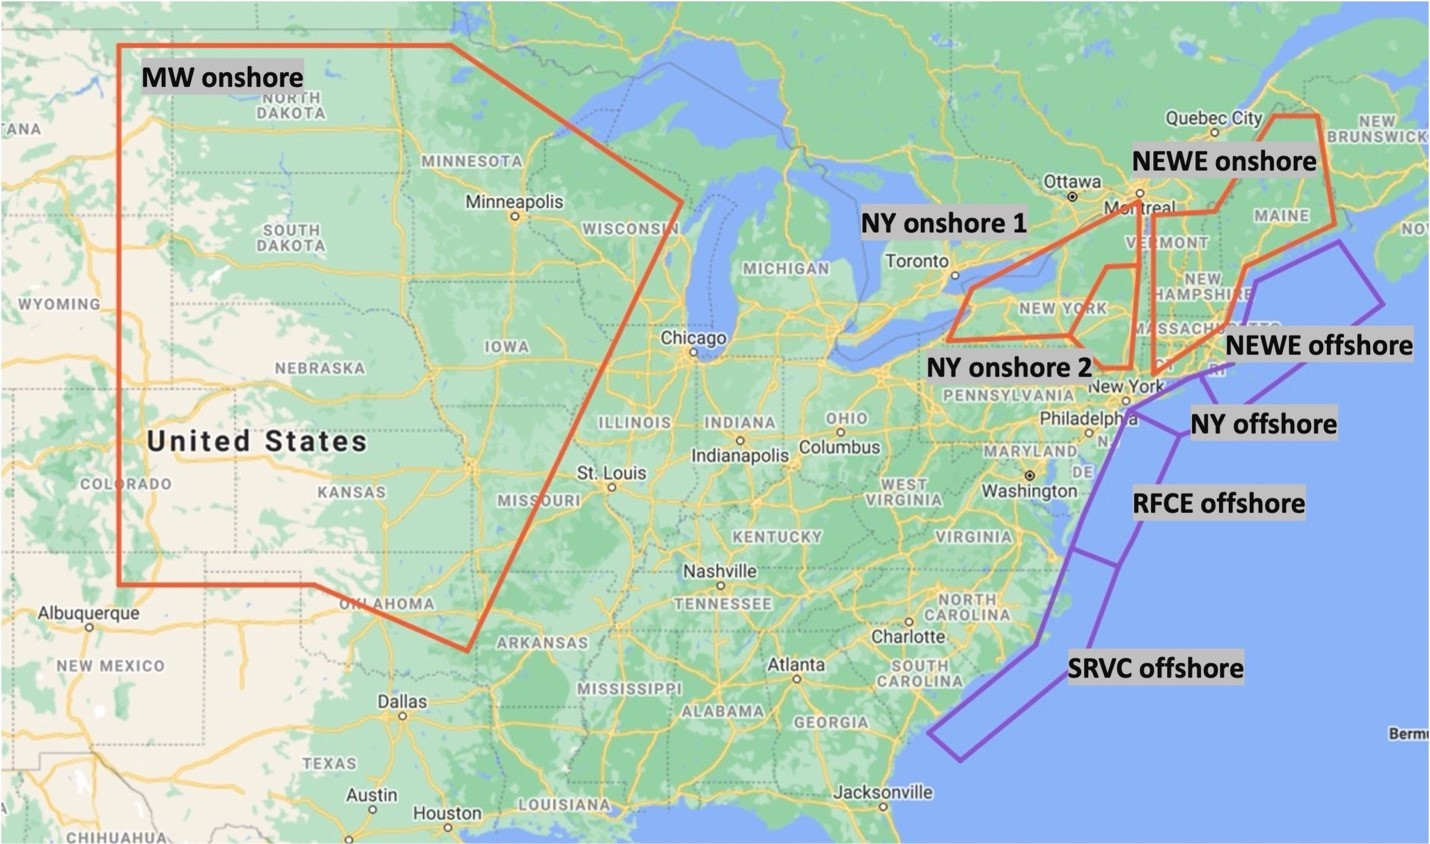

<ol>
<li> NY1 (NY_1 onshore; column B in csv file)</li>
<li> NY2 (NY_2 onshore; column C in csv file)</li>
<li> New England (NEWE onshore; column D in csv file)</li>
<li> Midwest (MW onshore; column E in csv file)</li>
<li> OSW1 (NEWE offshore; column F in csv file)</li>
<li> OSW2 (NY offshore; column G in csv file)</li>
<li> OSW3 (RFCE offshore; column H in csv file)</li>
<li> OSW4 (SRVC offshore; column I in csv file)</li>
</ol>


 <p>Hourly capacity factor data in 2011 for each site is provided in "wind_po_hrly.csv", which is already the aggregated data from multiple locations into one location. Values are between 0 and 1 that indicating the wind power generating potential for the turbine that installed in local area. For onshore area,the rated power for each turbine is 2 MW while the offshore are 6 MW, this is coordinated with the wind resource availability since onshore generally has less wind resource potential than offshore area.</p>
<h2>1. Combination of wind turbines to achive average 10 GW output</h2>

<p>Firstly, averagly 10 GW output is choosen to be standarized analysis parameter for combining the wind turbines together. It is not required to have a 10 GW output every single hour, but the annual output of the combination of wind turbines in each site can meet the requirement of 10GW * 8760 hours = 87600 GWh in a year. Assumption: capacity of single wind turbine in onshore and offshore area are <strong><em>2MW</em></strong> and <strong><em>6MW</em></strong> respectively, this is in coordinance with local wind resource availability.</p>


In [2]:
locations =  data.columns[1:]
turbine_power = [2,2,2,2,6,6,6,6]

In [3]:
number_of_turbines = []
for i in range(len(locations)):
    number_of_turbines.append(10000/(data[locations[i]].mean()*turbine_power[i]))
    print("Number of turbine for 10 GW for site",i+1,"is:","%.2f" % number_of_turbines[i])

Number of turbine for 10 GW for site 1 is: 16883.76
Number of turbine for 10 GW for site 2 is: 16703.97
Number of turbine for 10 GW for site 3 is: 10984.08
Number of turbine for 10 GW for site 4 is: 10931.94
Number of turbine for 10 GW for site 5 is: 3034.32
Number of turbine for 10 GW for site 6 is: 3357.26
Number of turbine for 10 GW for site 7 is: 3554.75
Number of turbine for 10 GW for site 8 is: 3460.91


<h2>2. Hour fraction in each power output range</h2>

#### <p> Combining wind turbines in individual spots can meet the assumption of generating averagly 10GW power output for each site. In the next step, calculation has been done for the fraction of hour in each power output range for site individually and the conbination sites.In order to get the fraction, data was processed as follows:</p>
<ol> 
    <li><strong>Calculate the total generation for the individual site in each hour.</strong></li>
<em>Total power generation in each hour = [individual turbine rated power] * [number of combined turbines] * [Capacity Factor]</em>
    <li><strong>Calculate the total generation for the combined wind turbines in each hour.</strong></li>
<em>Total power generation in each hour = (contribution percentage)*([individual turbine rated power] * [number of combined turbines] * [Capacity Factor])</em>
    <li><strong>Iterate through each column, count the number of hour that falls into each power range,then calculation time fraction of each power range.</strong></li>
<em>Proportion of power range = [number of hour in each power range] / [total hour] </em>
<ol>        



<h3> 2.1 Time fraction for the individual site in different power generation range</h3>

In [4]:
locations =  data.columns[1:]
hourly_energy_generation = []
for i in range(len(locations)):
    hourly_energy_generation.append(number_of_turbines[i]*data[locations[i]]*turbine_power[i])
    

In [5]:
power_generation = xr.DataArray(data = hourly_energy_generation)

In [6]:
fraction_less_two = []
# Calculate the hourly propotion for power generation less than 2GW in individual site
for i in range(len(hourly_energy_generation)):
    less_than_two = data[locations[i]]*number_of_turbines[i]*turbine_power[i] <= 2000
    count = np.count_nonzero(less_than_two)
    fraction_less_two.append("%.2f"%((count/len(data[locations[i]]))))

fraction_two_to_six = [] 
# Calculate the hourly propotion for power generation 2GW - 6GW in individual site
for i in range(len(hourly_energy_generation)):
    two_to_six = (data[locations[i]]*number_of_turbines[i]*turbine_power[i] > 2000) & (data[locations[i]]*number_of_turbines[i]*turbine_power[i] <=6000)
    count_two_to_six = np.count_nonzero(two_to_six)
    fraction_two_to_six.append("%.2f"%(count_two_to_six/len(data[locations[i]])))

fraction_six_to_ten = []
# Calculate the hourly propotion for power generation 6GW - 10GW in individual site
for i in range(len(hourly_energy_generation)):
    six_to_ten = (data[locations[i]]*number_of_turbines[i]*turbine_power[i] > 6000) & (data[locations[i]]*number_of_turbines[i]*turbine_power[i] <=10000)
    count_six_to_ten = np.count_nonzero(six_to_ten)
    fraction_six_to_ten.append("%.2f"%(count_six_to_ten/len(data[locations[i]])))

fraction_above10 = []
# Calculate the hourly propotion for power generation above 10GW in individual site
for i in range(len(hourly_energy_generation)):
    above_ten = (data[locations[i]]*number_of_turbines[i]*turbine_power[i] > 10000)
    above_ten = np.count_nonzero(above_ten)
    fraction_above10.append("%.2f"%( above_ten/len(data[locations[i]])))


<h3> 2.2 Time fraction for combined sites in different power generation range.</h3>

In [7]:
combine = pd.DataFrame()
combine["site1234"]= 0.25 * (data[locations[0]]* number_of_turbines[0]+data[locations[1]]* number_of_turbines[1]+data[locations[2]]* number_of_turbines[2]+data[locations[3]]* number_of_turbines[3])*2 
combine["site1256"]= 0.25 * ((data[locations[0]]* number_of_turbines[0]+data[locations[1]]* number_of_turbines[1])*2+(data[locations[4]]* number_of_turbines[4]+data[locations[5]]* number_of_turbines[5])*6) 
combine["site5678"]= 0.25 * (data[locations[4]]* number_of_turbines[4]+data[locations[5]]* number_of_turbines[5]+data[locations[6]]* number_of_turbines[6]+data[locations[7]]* number_of_turbines[7])*6
combine["all_sites"]= 0.125 *( ((data[locations[0]]* number_of_turbines[0]+data[locations[1]]* number_of_turbines[1]+data[locations[2]]* number_of_turbines[2]+data[locations[3]]* number_of_turbines[3])*2)
                            + ((data[locations[4]]* number_of_turbines[4]+data[locations[5]]* number_of_turbines[5]+data[locations[6]]* number_of_turbines[6]+data[locations[7]]* number_of_turbines[7])*6))
combine.head()

,site1234,site1256,site5678,all_sites
0,17225.819301,15996.496708,8985.811743,13105.815522
1,17143.626468,15820.252913,9175.937295,13159.781881
2,16735.371788,15459.305077,9396.737768,13066.054778
3,16353.090355,15127.556492,9537.293610,12945.191982
4,16120.703439,14953.064793,9695.577042,12908.140240


In [8]:
loc=  combine.columns[:]
c_less_two = [] 
#calculate the proportion of hour that wind turbines in the combined sites generate power less than 2GW
for i in range(len(loc)):
    less_two = combine[loc[i]]<=2000
    count_less_two = np.count_nonzero(less_two)
    c_less_two.append("%.2f"%(count_less_two/len(combine[loc[i]])))

c_26 = []
#calculate the proportion of hour that wind turbines in the combined sites generate power between 2GW to 6GW
for i in range(len(loc)):
    c2_6 = (combine[loc[i]]>2000)&(combine[loc[i]]<=6000)
    count_c2_6 = np.count_nonzero(c2_6)
    c_26.append("%.2f"%(count_c2_6/len(combine[loc[i]])))
    
c_610 = []
#calculate the proportion of hour that wind turbines in the combined sites generate power between 6GW to 10GW
for i in range(len(loc)):
    c6_10 = (combine[loc[i]]>6000)&(combine[loc[i]]<=10000)
    count_c6_10 = np.count_nonzero(c6_10)
    c_610.append("%.2f"%(count_c6_10/len(combine[loc[i]])))

c_10 =[]
#calculate the proportion of hour that wind turbines in the combined sites generate power above 10GW
for i in range(len(loc)):
    above10 = combine[loc[i]]>10000
    count_above10 = np.count_nonzero(above10)
    c_10.append("%.2f"%(count_above10/len(combine[loc[i]])))
 

In [9]:
fraction_combine = pd.DataFrame({"<2GW":c_less_two,"2GW-6GW":c_26,"6GW-10GW":c_610,">10GW":c_10})
fraction_combine

,<2GW,2GW-6GW,6GW-10GW,>10GW
0,0.03,0.27,0.26,0.44
1,0.07,0.26,0.23,0.44
2,0.04,0.25,0.25,0.46
3,0.01,0.24,0.29,0.46


<h3> 2.3 Summarize hourly fraction for energy range of individual site and combined sites in a table.</h3>

In [10]:
fraction_combine1=fraction_combine.transpose()
fraction_table = pd.DataFrame({"<2GW":fraction_less_two,"2GW-6GW":fraction_two_to_six,"6GW-10GW":fraction_six_to_ten,">10GW":fraction_above10})

fraction_table=fraction_table.rename(index={0:"site1",1:"site2",2:"site3",3:"site4",4:"site5",5:"site6",6:"site7",7:"site8"}).T
fraction_table["site1234"]= fraction_combine1.iloc[:,0]
fraction_table["site1256"]= fraction_combine1.iloc[:,1]
fraction_table["site5678"]= fraction_combine1.iloc[:,2]
fraction_table["all_sites"]= fraction_combine1.iloc[:,3]
fraction_table

,site1,site2,site3,site4,site5,site6,site7,site8,site1234,site1256,site5678,all_sites
<2GW,0.16,0.19,0.09,0.03,0.11,0.16,0.17,0.08,0.03,0.07,0.04,0.01
2GW-6GW,0.29,0.24,0.23,0.20,0.21,0.18,0.21,0.23,0.27,0.26,0.25,0.24
6GW-10GW,0.17,0.15,0.20,0.29,0.16,0.17,0.16,0.21,0.26,0.23,0.25,0.29
>10GW,0.39,0.42,0.49,0.49,0.52,0.48,0.46,0.48,0.44,0.44,0.46,0.46


<h2>3. Energy Generation Fraction in Each Season and Daily Time Range </h2>
<h3>3.1 Annually Power Generation in Each Site and Combination </h3>
First, computing the total generation for each site and combined sites.
    

In [11]:
power_generation = pd.DataFrame(data = hourly_energy_generation).T
power_generation["site1234"]= combine.iloc[:,0]
power_generation["site1256"]= combine.iloc[:,1]
power_generation["site5678"]= combine.iloc[:,2]
power_generation["all_sites"]= combine.iloc[:,3]
power_generation["time"]=pd.to_datetime(data['date.time'])
df=power_generation.set_index('time')
df.head()

,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
time,,,,,,,,,,,,
2011-01-01 00:00:00,24489.570809,15033.690574,15245.824723,14134.191098,13826.528713,10636.196738,7549.150947,3931.370577,17225.819301,15996.496708,8985.811743,13105.815522
2011-01-01 01:00:00,23704.840489,14915.357204,14892.512059,15061.796117,13968.160031,10692.653927,7620.618311,4422.316910,17143.626468,15820.252913,9175.937295,13159.781881
2011-01-01 02:00:00,22629.765813,14439.543819,14181.912143,15690.265379,13913.647328,10854.263346,7986.464850,4832.575548,16735.371788,15459.305077,9396.737768,13066.054778
2011-01-01 03:00:00,21177.276158,14574.451165,13357.018891,16303.615205,13841.208946,10917.289701,8268.425492,5122.250302,16353.090355,15127.556492,9537.293610,12945.191982
2011-01-01 04:00:00,19614.929862,15237.628565,12845.393369,16784.861958,13833.131189,11126.569557,8399.914225,5422.693199,16120.703439,14953.064793,9695.577042,12908.140240


In [12]:
time = df.index
site = df.columns[0:]

da_cf = xr.Dataset(data_vars={
    'total_generation':(['time','site'],df)
},
                   coords={
                       'time':time,
                       'site':site}
                  )
da_cf

<xarray.Dataset>
Dimensions:           (time: 8760, site: 12)
Coordinates:
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
  * site              (site) object 'ny_1_onshore' ... 'all_sites'
Data variables:
    total_generation  (time, site) float64 2.449e+04 1.503e+04 ... 1.217e+04

<h2>3. Seasonal and Diurnal Wind Resource Distribution </h2>
<h3>
3.1 Wind Resource Distribution In Each Season For Individual Site and Combined Sites　</h3>

December, January and February (djf) as winter.

March, April and May (mam) as spring.

Jun, July and August (jja) as summer.

September, October and December (son) as autumn.

In [13]:
djf = da_cf.isel(time=da_cf.time.dt.month.isin([12,1,2]))
mam = da_cf.isel(time=da_cf.time.dt.month.isin([3,4,5]))
jja = da_cf.isel(time=da_cf.time.dt.month.isin([6,7,8]))
son = da_cf.isel(time=da_cf.time.dt.month.isin([9,10,11]))

In [14]:
djf_m = djf.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

In [15]:
mam_m = mam.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

In [16]:
jja_m = jja.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

In [17]:
son_m = son.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

In [18]:
seasonal_fraction = djf_m.to_dataframe().rename(columns={"total_generation":"djf"})

In [19]:
seasonal_fraction['mam']= mam_m.to_dataframe().rename(columns={"total_generation":"mam"})
seasonal_fraction['jja']= jja_m.to_dataframe().rename(columns={"total_generation":"jja"})
seasonal_fraction['son']= son_m.to_dataframe().rename(columns={"total_generation":"son"})
seasonal_fraction_T = seasonal_fraction.T
seasonal_fraction_T

site,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
djf,0.294683,0.293541,0.281153,0.266952,0.275152,0.274259,0.286421,0.286086,0.284082,0.284409,0.280479,0.282281
mam,0.285654,0.314927,0.286175,0.270836,0.286271,0.291667,0.305961,0.276699,0.289398,0.294630,0.290149,0.289774
jja,0.154928,0.157559,0.181450,0.204498,0.189009,0.184694,0.165689,0.193583,0.174608,0.171547,0.183244,0.178926
son,0.265177,0.234051,0.251217,0.257468,0.249414,0.249203,0.241938,0.243653,0.251978,0.249461,0.246052,0.249015


In [20]:
seasonal_fraction_T

site,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
djf,0.294683,0.293541,0.281153,0.266952,0.275152,0.274259,0.286421,0.286086,0.284082,0.284409,0.280479,0.282281
mam,0.285654,0.314927,0.286175,0.270836,0.286271,0.291667,0.305961,0.276699,0.289398,0.294630,0.290149,0.289774
jja,0.154928,0.157559,0.181450,0.204498,0.189009,0.184694,0.165689,0.193583,0.174608,0.171547,0.183244,0.178926
son,0.265177,0.234051,0.251217,0.257468,0.249414,0.249203,0.241938,0.243653,0.251978,0.249461,0.246052,0.249015


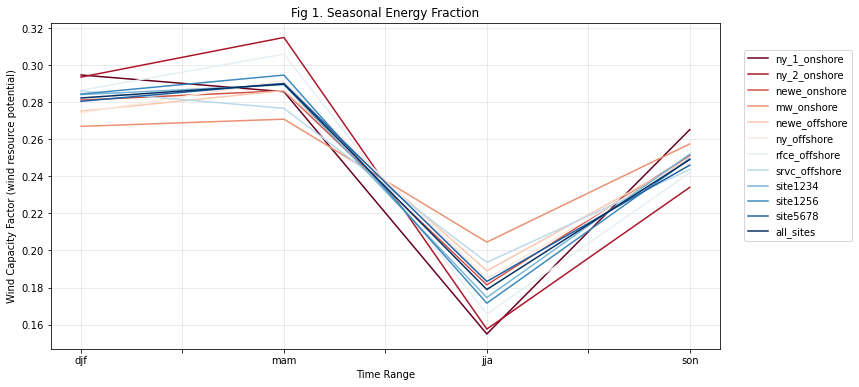

In [21]:
plt.rcParams['figure.figsize'] = (12, 6)
seasonal_fraction_T.plot(cmap='RdBu')
plt.grid(alpha=0.3)
plt.ylabel('Wind Capacity Factor (wind resource potential)');
plt.xlabel('Time Range');
plt.title('Fig 1. Seasonal Energy Fraction');
plt.legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)

<h3>3.3 Wind Resource Distribution In Daily Time Range For Individual Site and Combined Sites　</h3>
Time range in a day is divided into 
<ol>
    <li>11pm - 5am</li> <li>5am - 11am</li> <li>11am - 5pm</li>  <li>5pm - 11 pm</li></ol>
    First select data in certain time range throughout the total wind energy generation dataset, and get the wind resource distribution in each time range by dividing the sum of average in each time range.

In [22]:
pm11_am5 = da_cf.isel(time=da_cf.time.dt.hour.isin([23,0,1,2,3,4]))
am5_am11 = da_cf.isel(time=da_cf.time.dt.hour.isin([5,6,7,8,9,10]))
am11_pm5 = da_cf.isel(time=da_cf.time.dt.hour.isin([11,12,13,14,15,16]))
pm5_pm11 = da_cf.isel(time=da_cf.time.dt.hour.isin([17,18,19,20,21,22]))

In [23]:
pm11_am5_m=pm11_am5.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())
am5_am11_m=am5_am11.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())
am11_pm5_m=am11_pm5.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())
pm5_pm11_m=pm5_pm11.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())

time_fraction = pm11_am5_m.to_dataframe().rename(columns={"total_generation":"pm11_am5"})
time_fraction['am5_am11'] = am5_am11_m.to_dataframe().rename(columns={"total_generation":"am5_am11"})
time_fraction['am11_pm5'] = am11_pm5_m.to_dataframe().rename(columns={"total_generation":"am11_pm5"})
time_fraction['pm5_pm11'] = pm5_pm11_m.to_dataframe().rename(columns={"total_generation":"pm5_pm11"})
time_fraction=time_fraction.T
time_fraction

site,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
pm11_am5,0.285889,0.290093,0.277586,0.279239,0.263481,0.278982,0.271405,0.267140,0.283202,0.279611,0.270252,0.276727
am5_am11,0.274829,0.263770,0.254088,0.299594,0.247193,0.252970,0.256586,0.259125,0.273070,0.259690,0.253968,0.263519
am11_pm5,0.217150,0.212504,0.221254,0.229307,0.236219,0.221383,0.226446,0.230902,0.220054,0.221814,0.228737,0.224396
pm5_pm11,0.222132,0.233633,0.247071,0.191860,0.253108,0.246665,0.245564,0.242833,0.223674,0.238884,0.247042,0.235358


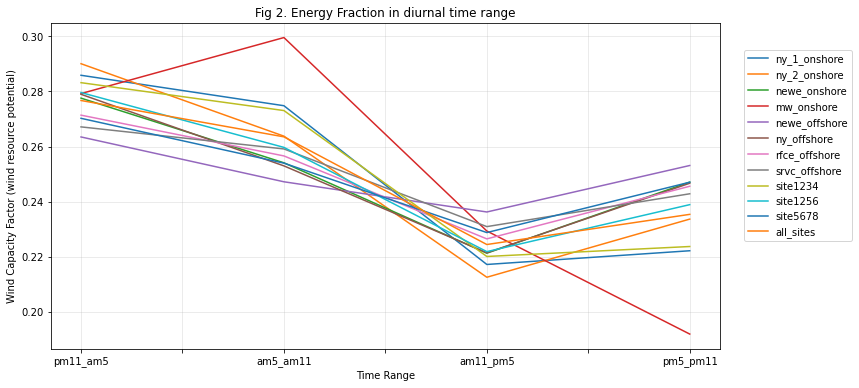

In [24]:
time_fraction.plot()
plt.grid(alpha=0.3)
plt.ylabel('Wind Capacity Factor (wind resource potential)');
plt.xlabel('Time Range');
plt.title('Fig 2. Energy Fraction in diurnal time range');
plt.legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)

<h2>4. Low Wind Energy Hour in Each Season and Daily Time Range </h2>
In this part, low energy production hour (total generation less than 2GWh) is summed together in both seasonal and diurnal dimensions to investigate which season and time range has the lowest energy potential. Furthermore, studies on the longest continuous hours that genarate less than 2GWh and number of countinuous low-energy hours that falls in high (>36 hours), medium (24~36 hours) and low (12~24 hours) range has been calculated by defining functions.
<h3> 4.1 Total Low Energy Hour in Each Season </h3>
    



In [25]:
djf_low = (djf<2000).sum('time')
mam_low = (mam<2000).sum('time')
jja_low = (jja<2000).sum('time')
son_low = (son<2000).sum('time')

In [26]:
seasonal_low = djf_low.to_dataframe().rename(columns={"total_generation":"djf"})
seasonal_low['mam']=mam_low.to_dataframe().rename(columns={"total_generation":"mam"})
seasonal_low['jja']=jja_low.to_dataframe().rename(columns={"total_generation":"jja"})
seasonal_low['son']=son_low.to_dataframe().rename(columns={"total_generation":"son"})
seasonal_low=seasonal_low.T
seasonal_low

site,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
djf,282,314,150,9,219,320,317,133,13,92,62,4
mam,302,311,152,13,190,248,169,74,12,111,38,5
jja,510,633,291,110,322,470,486,245,144,278,112,55
son,265,436,186,110,246,373,502,220,55,118,108,23


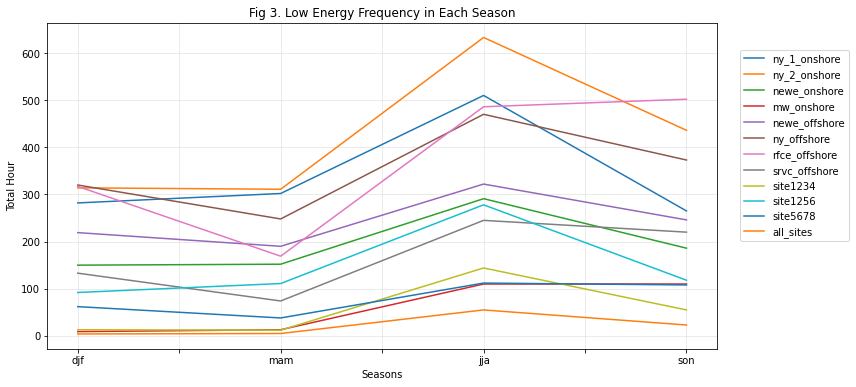

In [27]:
plt.rcParams['figure.figsize'] = (12, 6)
seasonal_low.plot()
plt.grid(alpha=0.3)
plt.ylabel('Total Hour');
plt.xlabel('Seasons');
plt.title('Fig 3. Low Energy Frequency in Each Season');
plt.legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)

<h3>4.2 Total Low Energy Hour in Daily Time Range</h3>

In [28]:
pm11_am5_low = (pm11_am5<2000).sum('time')
am5_am11_low = (am5_am11<2000).sum('time')
am11_pm5_low = (am11_pm5<2000).sum('time')
pm5_pm11_low = (pm5_pm11<2000).sum('time')

In [29]:
hourly_low = pm11_am5_low.to_dataframe().rename(columns={"total_generation":"pm11_am5"})
hourly_low['am5_am11'] = am5_am11_low.to_dataframe().rename(columns={"total_generation":"am5_am11"})
hourly_low['am11_pm5'] = am11_pm5_low.to_dataframe().rename(columns={"total_generation":"am11_pm5"})
hourly_low['pm5_pm11'] = pm5_pm11_low.to_dataframe().rename(columns={"total_generation":"pm5_pm11"})
hourly_low=hourly_low.T
hourly_low

site,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
pm11_am5,208,267,93,13,211,241,302,134,3,66,54,0
am5_am11,225,365,159,0,242,358,348,169,5,113,82,0
am11_pm5,495,574,303,85,289,474,442,197,111,258,136,61
pm5_pm11,431,488,224,144,235,338,382,172,105,162,48,26


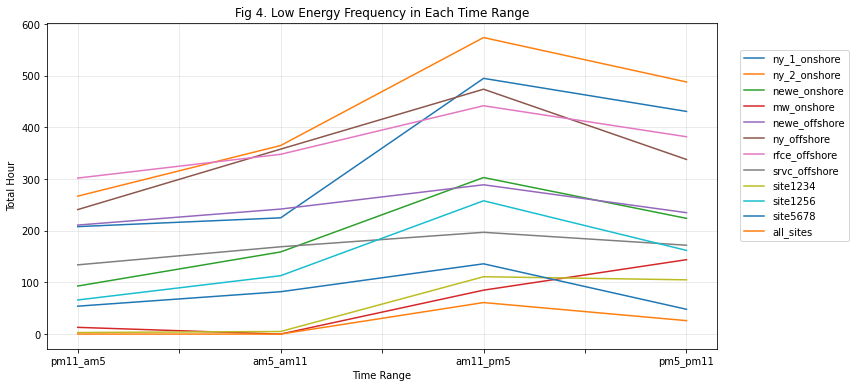

In [30]:
hourly_low.plot()
plt.grid(alpha=0.3)
plt.ylabel('Total Hour');
plt.xlabel('Time Range');
plt.title('Fig 4. Low Energy Frequency in Each Time Range');
plt.legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)

<h3>4.3 Continuous Low Energy Hour in independent site and combined sites</h3>
Defined a function called <strong><em>get_events</strong></em> to select the hour that has energy output lower than 2GW. Defined another fiunction called <strong><em>count_event</strong></em> in order to sum the number of events that belong to each time extend.
<em>
<ol>Low time extend: 12 ~ 24 hours </ol>
<ol>Medium time extend: 24 ~ 36 hours </ol>
<ol>High time extend: >36 hours </ol>
</em>

In [31]:
def get_events(ts):
    i = 1
    events = {}
    flag = False
    for hr in range(len(ts)):
        if ts[hr] < 2000:
            if flag:
                events[str(i)].append(hr)
            else:
                events[str(i)] = [hr]
            flag = True
        else:
            i+=1 if flag else 0
            flag = 0
    return events

def count_events(events):
    hours_in_events = [len(v) for v in events.values()]
    maxHours = max(hours_in_events)
    hours1224 = sum([(x>12) & (x<=24) for x in hours_in_events])
    hours2436 = sum([(x>24) & (x<=36) for x in hours_in_events])
    hours36 = sum([x>36 for x in hours_in_events])
    return(maxHours, hours1224, hours2436, hours36)

In [32]:
continuous_hours = {}
for site in range(len(da_cf.site.values)):
    ts = da_cf.total_generation[:, site]
    events = get_events(ts)
    continuous_hours[da_cf.site.values[site]] = count_events(events)
continuous_hours

{'ny_1_onshore': (43, 28, 3, 2),
 'ny_2_onshore': (55, 37, 6, 3),
 'newe_onshore': (23, 22, 0, 0),
 'mw_onshore': (15, 1, 0, 0),
 'newe_offshore': (59, 9, 5, 2),
 'ny_offshore': (68, 32, 2, 3),
 'rfce_offshore': (55, 29, 4, 4),
 'srvc_offshore': (59, 13, 1, 3),
 'site1234': (14, 1, 0, 0),
 'site1256': (35, 14, 2, 0),
 'site5678': (45, 5, 0, 1),
 'all_sites': (9, 0, 0, 0)}

In [33]:
con_hour=pd.DataFrame.from_dict(continuous_hours)
con_hour.rename(index={0:'maximum hour',1:'12~14 hours',2:'24~36 hours',3:'>36 hours'})

,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
maximum hour,43,55,23,15,59,68,55,59,14,35,45,9
12~14 hours,28,37,22,1,9,32,29,13,1,14,5,0
24~36 hours,3,6,0,0,5,2,4,1,0,2,0,0
>36 hours,2,3,0,0,2,3,4,3,0,0,1,0


<h2>5. Renewable Energy Supply vs Electricity Demand in New York</h2>
    In the final part, solar energy was added as supplimentary renewable resource to wind energy, and electricity load data for New York State 2011 was loaded to analyze the gap between clean energy generation and demand. Data has been processed to analyze whether the introduction of solar resource can help meet the requirement of New York State electricity demand.

In [34]:
# Wind energy generation data
df_wind = df.to_xarray()

#Import solar potential data
doi = "doi:10.5281/zenodo.5750726"
fname = "solar_po.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:b7acc6026f08ff062e03aa21625cc974",
)
file_path
data_solar=pd.read_csv(file_path)
data_solar

data_solar['time'] = pd.to_datetime(data_solar['datatime'])
df_solar = data_solar.set_index('time')
del df_solar['datatime']
df_solar = df_solar.to_xarray()

# Import electricity demand data
doi = "doi:10.5281/zenodo.5750734"
fname = "elec_load.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:c5bd92f180b57e8629b0ca3891d25812",
)
file_path
data_elec=pd.read_csv(file_path)

data_elec['time'] = pd.to_datetime(data_elec['datatime'])
df_elec = data_elec.set_index('time')
del df_elec['datatime']
df_elec = df_elec.to_xarray()

<h3>5.1 Annual Renewable Resource Abundance and Electricity Consumption Trend</h3>
Used 10 days as extend to resample data. 

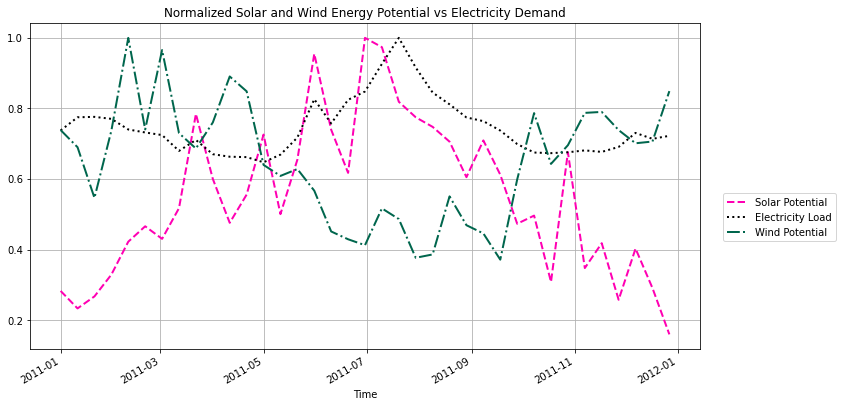

In [35]:
rs_solar = df_solar.resample(time='10D').mean('time')/df_solar.resample(time='10D').mean('time').max()
rs_elec = df_elec.resample(time='10D').mean('time')/df_elec.resample(time='10D').mean('time').max()
#rs_elec = df_elec.rolling(time=12, center = True).mean('time')/df_elec.rolling(time=12, center = True).mean('time').max()
rs_wind = df_wind.all_sites.resample(time='10D').mean('time')/df_wind.resample(time='10D').mean('time').max()

rs_solar.electrfied_load.plot(linestyle='dashed',color=(1, 0, 0.7),linewidth=2,label='Solar Potential')
rs_elec.current_load.plot(color='k',linestyle='dotted',linewidth=2,label='Electricity Load')
rs_wind.all_sites.plot(linestyle='-.', linewidth=2,color=(0, 0.4, 0.3),label='Wind Potential')
plt.grid()
plt.title('Normalized Solar and Wind Energy Potential vs Electricity Demand')
plt.xlabel("Time")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)

<h3>5.2 Fulfilling Comparison Between Solely Relialing On Wind Energy and Combination of Solar and Wind Energy</h3>
<ol> plotting wind generation of onshore and offshore and 4 integrated sites with the electricity demand together.</ol>

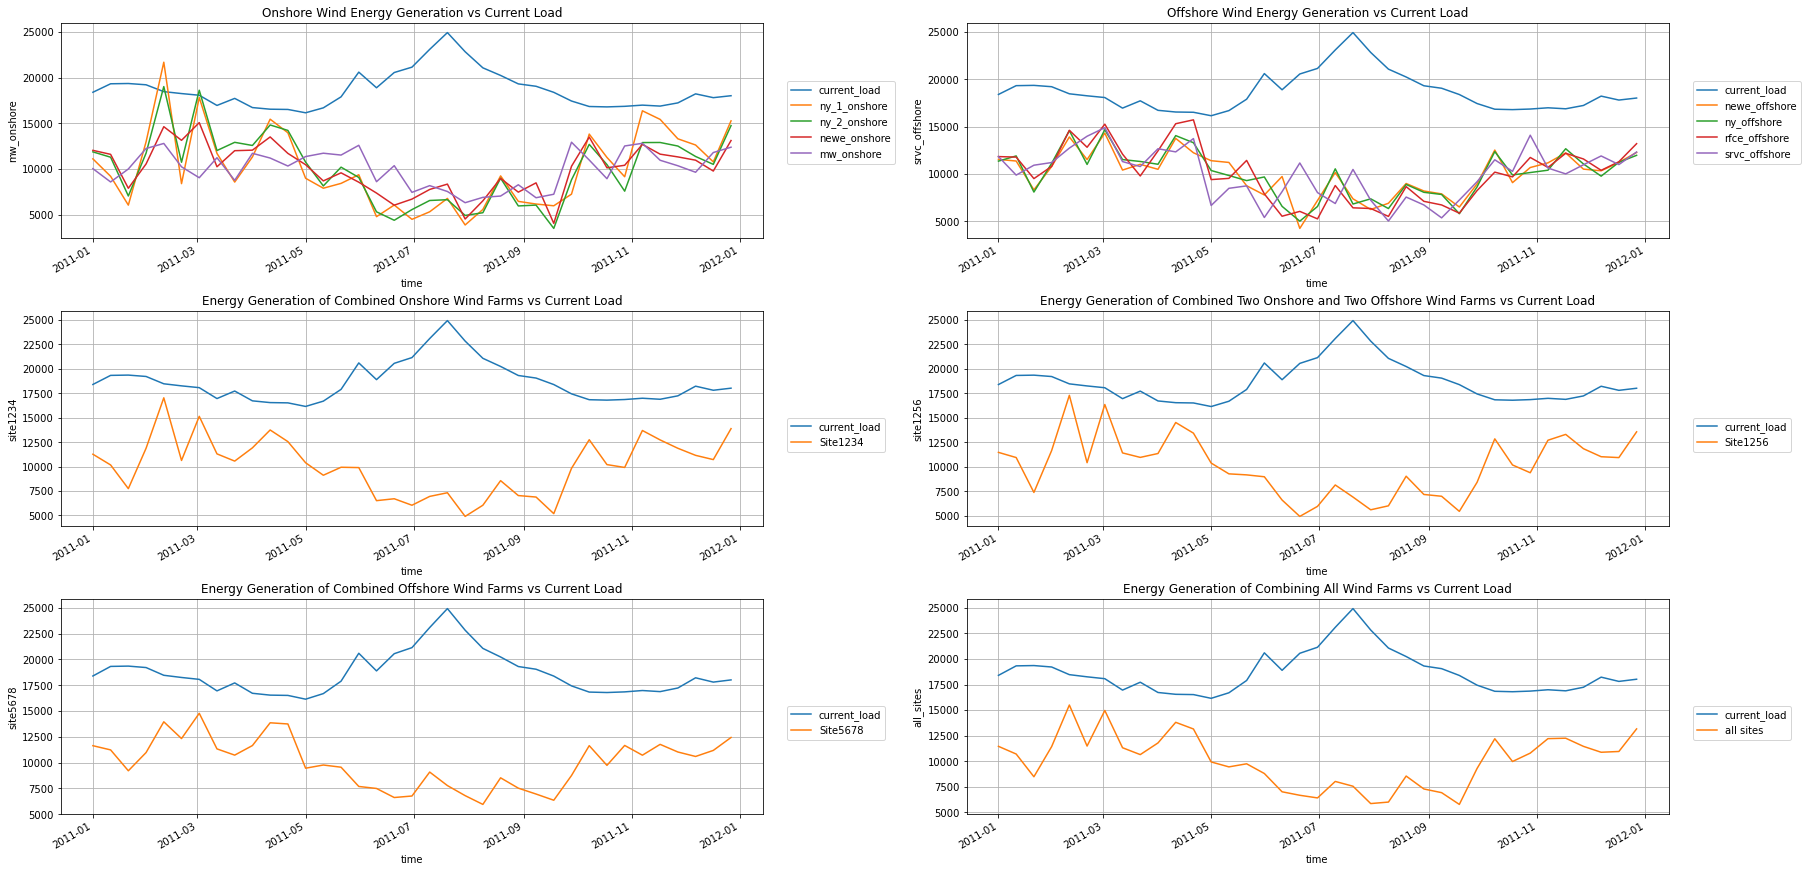

In [36]:
fig, axes = plt.subplots(figsize=(25,12),nrows=3,ncols=2, constrained_layout = True)
rs_demand_12 = df_elec.resample(time='10D').mean('time')


#Onshore wind farm generation vs demand
rs_wind_12=df_wind.resample(time='10D').mean('time')
rs_demand_12 = df_elec.resample(time='10D').mean('time')
rs_demand_12.current_load.plot(ax = axes[0,0],label="current_load")
rs_wind_12.ny_1_onshore.plot(ax = axes[0,0],label="ny_1_onshore")
rs_wind_12.ny_2_onshore.plot(ax = axes[0,0],label="ny_2_onshore")
rs_wind_12.newe_onshore.plot(ax = axes[0,0],label="newe_onshore")
rs_wind_12.mw_onshore.plot(ax = axes[0,0],label="mw_onshore")
axes[0][0].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[0][0].title.set_text('Onshore Wind Energy Generation vs Current Load')
axes[0][0].grid()

#Offshore wind farm generation vs demand
rs_demand_12.current_load.plot(ax = axes[0,1],label="current_load")
rs_wind_12.newe_offshore.plot(ax = axes[0,1],label="newe_offshore")
rs_wind_12.ny_offshore.plot(ax = axes[0,1],label="ny_offshore")
rs_wind_12.rfce_offshore.plot(ax = axes[0,1],label="rfce_offshore")
rs_wind_12.srvc_offshore.plot(ax = axes[0,1],label="srvc_offshore")
axes[0][1].title.set_text('Offshore Wind Energy Generation vs Current Load')
axes[0][1].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[0][1].grid()

#Combining onshore and offshore wind farm generation vs demand
rs_demand_12.current_load.plot(ax = axes[1,0],label="current_load")
rs_wind_12.site1234.plot(ax = axes[1,0],label="Site1234")
axes[1][0].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[1][0].title.set_text('Energy Generation of Combined Onshore Wind Farms vs Current Load')
axes[1][0].grid()

rs_demand_12.current_load.plot(ax = axes[1,1],label="current_load")
rs_wind_12.site1256.plot(ax = axes[1,1],label="Site1256")
axes[1][1].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[1][1].title.set_text('Energy Generation of Combined Two Onshore and Two Offshore Wind Farms vs Current Load')
axes[1][1].grid()

rs_demand_12.current_load.plot(ax = axes[2,0],label="current_load")
rs_wind_12.site5678.plot(ax = axes[2,0],label="Site5678")
axes[2][0].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[2][0].title.set_text('Energy Generation of Combined Offshore Wind Farms vs Current Load')
axes[2][0].grid()

rs_demand_12.current_load.plot(ax = axes[2,1],label="current_load")
rs_wind_12.all_sites.plot(ax = axes[2,1],label="all sites")
axes[2][1].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[2][1].title.set_text('Energy Generation of Combining All Wind Farms vs Current Load')
axes[2][1].grid()

<h3>4. Renewable Energy Potential vs Electricity Demand in New York State </h3>
Plotting the sum of solar and wind generation of onshore and offshore sites and 4 integrated sites with electricity demand together. Assuming the solar capacity in New York State is 15 GW.

In [37]:
sg = (df_solar*15000).to_array()
ds_wind_solar = sg + df_wind

In [38]:
ds_wind_solar.std(dim='time')

<xarray.Dataset>
Dimensions:        (variable: 1)
Coordinates:
  * variable       (variable) <U15 'electrfied_load'
Data variables:
    ny_1_onshore   (variable) float64 8.353e+03
    ny_2_onshore   (variable) float64 8.556e+03
    newe_onshore   (variable) float64 6.578e+03
    mw_onshore     (variable) float64 4.981e+03
    newe_offshore  (variable) float64 6.614e+03
    ny_offshore    (variable) float64 6.994e+03
    rfce_offshore  (variable) float64 7.229e+03
    srvc_offshore  (variable) float64 6.301e+03
    site1234       (variable) float64 5.769e+03
    site1256       (variable) float64 6.503e+03
    site5678       (variable) float64 5.814e+03
    all_sites      (variable) float64 5.27e+03

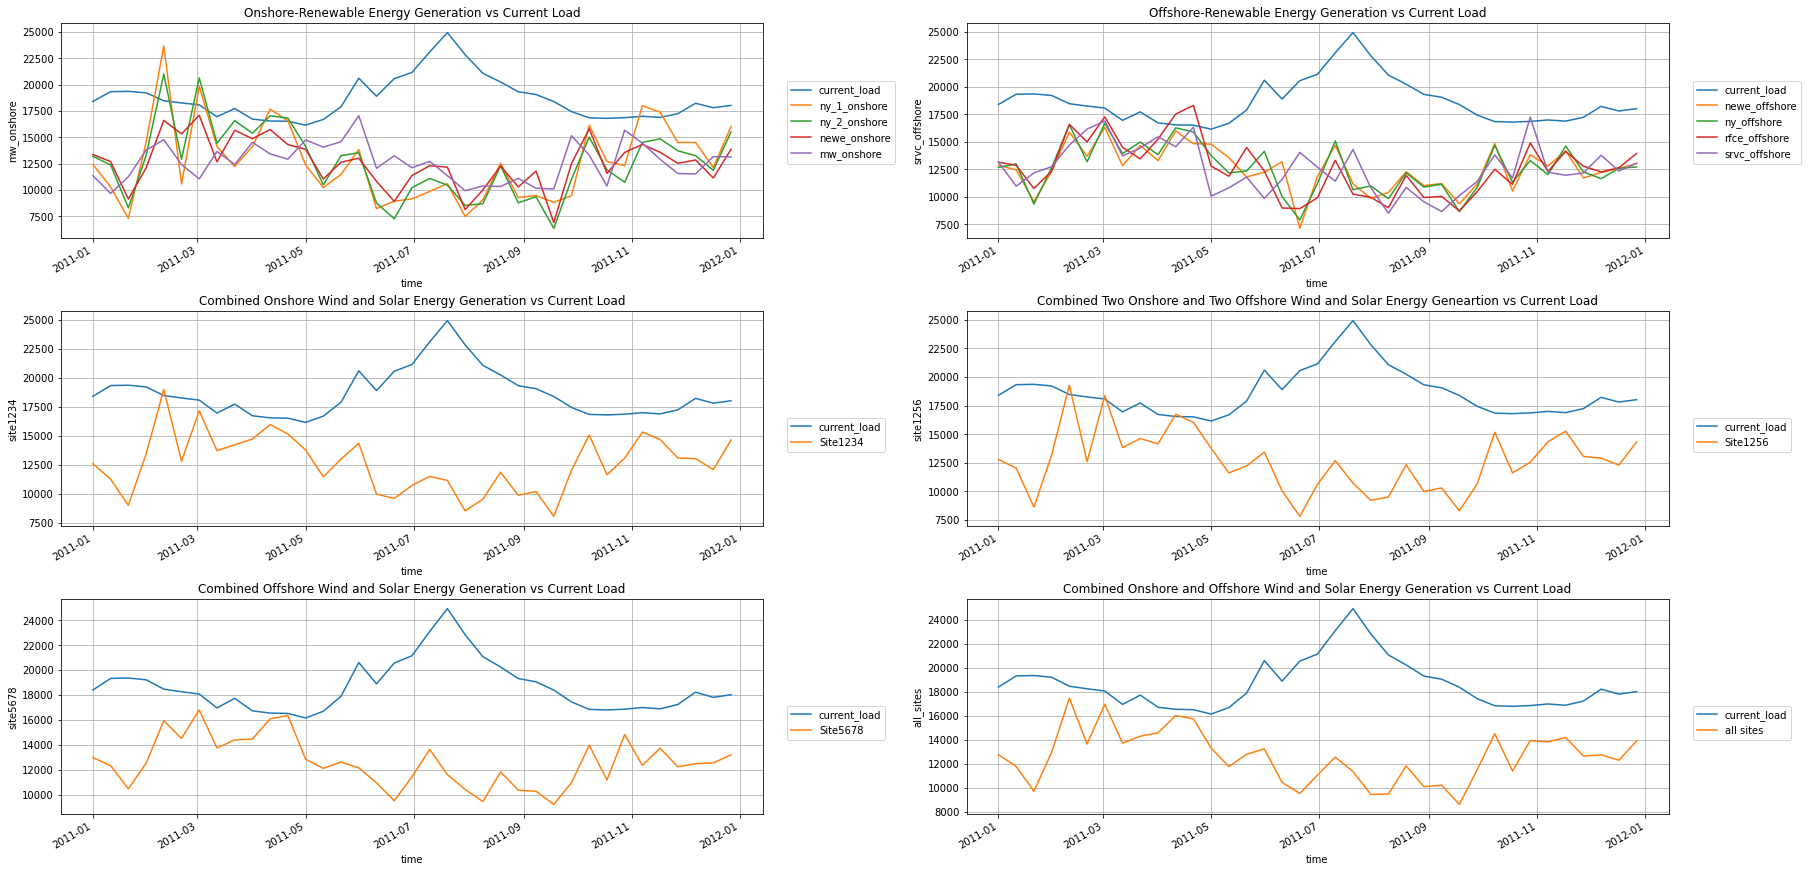

In [39]:
fig, axes = plt.subplots(figsize=(25,12),nrows=3,ncols=2, constrained_layout = True)
rs_demand_12 = df_elec.resample(time='10D').mean('time')

#Onshore wind farm generation vs demand
rs_wind_solar=ds_wind_solar.resample(time='10D').mean('time')
rs_demand_12 = df_elec.resample(time='10D').mean('time')
rs_demand_12.current_load.plot(ax = axes[0,0],label="current_load")
rs_wind_solar.ny_1_onshore.plot(ax = axes[0,0],label="ny_1_onshore")
rs_wind_solar.ny_2_onshore.plot(ax = axes[0,0],label="ny_2_onshore")
rs_wind_solar.newe_onshore.plot(ax = axes[0,0],label="newe_onshore")
rs_wind_solar.mw_onshore.plot(ax = axes[0,0],label="mw_onshore")
axes[0][0].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[0][0].title.set_text('Onshore-Renewable Energy Generation vs Current Load')
axes[0][0].grid()

#Offshore wind farm generation vs demand
rs_demand_12.current_load.plot(ax = axes[0,1],label="current_load")
rs_wind_solar.newe_offshore.plot(ax = axes[0,1],label="newe_offshore")
rs_wind_solar.ny_offshore.plot(ax = axes[0,1],label="ny_offshore")
rs_wind_solar.rfce_offshore.plot(ax = axes[0,1],label="rfce_offshore")
rs_wind_solar.srvc_offshore.plot(ax = axes[0,1],label="srvc_offshore")
axes[0][1].title.set_text('Offshore-Renewable Energy Generation vs Current Load')
axes[0][1].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[0][1].grid()

#Combining onshore and offshore wind farm generation vs demand
rs_demand_12.current_load.plot(ax = axes[1,0],label="current_load")
rs_wind_solar.site1234.plot(ax = axes[1,0],label="Site1234")
axes[1][0].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[1][0].title.set_text('Combined Onshore Wind and Solar Energy Generation vs Current Load')
axes[1][0].grid()

rs_demand_12.current_load.plot(ax = axes[1,1],label="current_load")
rs_wind_solar.site1256.plot(ax = axes[1,1],label="Site1256")
axes[1][1].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[1][1].title.set_text('Combined Two Onshore and Two Offshore Wind and Solar Energy Geneartion vs Current Load')
axes[1][1].grid()

rs_demand_12.current_load.plot(ax = axes[2,0],label="current_load")
rs_wind_solar.site5678.plot(ax = axes[2,0],label="Site5678")
axes[2][0].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[2][0].title.set_text('Combined Offshore Wind and Solar Energy Generation vs Current Load')
axes[2][0].grid()

rs_demand_12.current_load.plot(ax = axes[2,1],label="current_load")
rs_wind_solar.all_sites.plot(ax = axes[2,1],label="all sites")
axes[2][1].legend(bbox_to_anchor=(1.02, 0.3), loc = 3, borderaxespad = 1)
axes[2][1].title.set_text('Combined Onshore and Offshore Wind and Solar Energy Generation vs Current Load')
axes[2][1].grid()